# <center> <img src='../../images/fsktm.jpg' width="500" height="400"> </center>
# <center> WQD7002 - SCIENCE DATA RESEARCH PROJECT </center>
## <center> NEURAL RUBIK’S </center>
## <center> Solving Rubik's Cube Using Nueral Network (Hueristic Learning) </center>
### <center> Scripted by : Gunasegarran Magadevan (WQD170002) </center>
### <center> Supervised by : Dr.Aznul Qalid Md Sabri </center>
# <center> <img src="../../images/RubiksNeural.jpg" width="400" height="300"> </center>
----




### STEP 1 : Installing and upgrading the package

In [0]:
# Upgrading the pip package to the latest version
!python -m pip install PyHamcrest --upgrade --quiet
!python -m pip install tensorflow --upgrade --quiet
!python -m pip install rubikai --no-cache-dir --upgrade --quiet
!python -m pip install seaborn --no-cache-dir --upgrade --quiet
!python -m pip install keras --upgrade --quiet
!python -m pip install numpy --upgrade --quiet
!pip install -U -q PyDrive

# Tensorflow package manually through terminal or cmd - https://anaconda.org/conda-forge
#conda install -c conda-forge tensorflow
#conda install -c conda-forge numpy

In [0]:
# Importing packages
import rubikai as rubik             # To use Rubik's Cube features and Heuristic search.
import numpy as np                  # To manipulate large multi-dimensional arrays .
import pandas as pd                 # To use data structures and data analysis tools.
import keras                        # High-level neural networks.  
import seaborn as sns               # To create statistical graphics.
import matplotlib.pyplot as plt     # To create 2D graphics.
             

### STEP 3 : Rubik's Cube Module

In [0]:
# Set as 3Dim (3x3)
dimCube = 3 
# Manually scrambled
notation1 = "U L B' R' F"
print('Applying sequence:', notation1)
sampleCube1 = rubik.Cube(dimCube).apply(notation1)
print(sampleCube1)

Applying sequence: U L B' R' F
    ggg
    yog
    www

wgb ooo goo yrr
rgr wwb obb ryy
rgb oog rbb ryy

    yyy
    wrw
    bbw


Applying random sequence: [F, D, R', B]


In [0]:
# Clean
del sampleCube1

### STEP 4 : Rubik's Cube Solver

In [0]:
# Get authentication to access GDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Trained data from steps = 50, epochs = 100
link = 'https://drive.google.com/open?id=1WBaAKFJ7qVPminP4NmwzBgpPw8Pm2kbm' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('T2_3_25_70_60_50.h5') 
m1 = keras.models.load_model('T2_3_25_70_60_50.h5')

link = 'https://drive.google.com/open?id=18F2o6P8TkHBSfKvK98RHaUUld7cX-VTX' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('T2_3_25_50_50_50_50.h5') 
m2 = keras.models.load_model('T2_3_25_50_50_50_50.h5')

link = 'https://drive.google.com/open?id=1zHpd0pRime9-RAuraL6zhWOY6peH2cI_' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('T2_3_25_50_40_30_20_20.h5') 
m3 = keras.models.load_model('T2_3_25_50_40_30_20_20.h5')

## Heuristics for the $3 \times 3 \times 3$ cube

Below is a list of heuristics that came up with, along with a short description of what they do. For a more detailed description, refer to the written report.

*   __`h_1`:__  
$$ 
h_1(c) = \max_{f\in\text{Faces}(c)}\#\text{misplaced-edges}(f) 
$$
Maximum over faces of the number of misplaced edge squares in each face.

*   __`h_2`:__  
$$
\begin{align}
h_2(c) =& \max_{f\in\text{Faces}(c)}\#\text{misplaced-corners}(f) 
\end{align}
$$
Sum of max and min of the number of misplaced edge squares in each face.

*   __`h_3`:__  
$$
\bar h_3(c) = \max_{f\in\text{Faces}(c)} \left[\#\text{misplaced-edges}(f) + \#\text{misplaced-corners}(f) \right]
$$
Maximum over faces of the number of misplaced edge squares plus the number of misplaced corner squares in each face.

*   __`h_4`:__  
$$
\begin{align}
\bar h_4(c) =& \max_{f\in\text{Faces}(c)}\left[ \#\text{misplaced-edges}(f) + \#\text{misplaced-corners}(f) \right] + \\
                      & \min_{f\in\text{Faces}(c)}\left[ \#\text{misplaced-edges}(f) + \#\text{misplaced-corners}(f) \right] 
\end{align}
$$
Sum of max and min of the number of misplaced edge squares plus the number of misplaced corner squares in each face.

*   __`h_5`:__   
$$
\bar h_5(c) = \max_{f\in\text{Faces}(c)}\#\text{misplaced-edges}(f) +  \max_{f\in\text{Faces}(c)} \#\text{misplaced-corners}(f)
$$
Maximum over faces of the number of misplaced edge squares in each face plus maximum over faces of the number of misplaced corner squares in each face




In [0]:
def h_1(cube, problem=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
    return max(result.values())
  

def h_2(cube, problem=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result[face]  = sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
          
    return max(result.values())


def add_c(i):
  if i == 0:
    return i+1
  elif i == 2:
    return i-1
  else:
    return i
  
def h_3(cube, problem=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result[face]  += sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
          
    return max(result.values())

def h_4(cube, problemtt=None):
    result = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result[face]  += sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
        
    return max(result.values())+min(result.values())    
  
def h_5(cube, problem=None):
    result_edges = {}
    result_corners = {}
    for face in rubik.Face:
        face_array = cube.get_face(face)
        cross = [(0, 1), (1, 0), (1, 2), (2, 1)]
        result_edges[face] = sum(face_array[c] != face_array[1, 1] for c in cross)
        corners = [(0,0), (0,2), (2,0), (2,2)]
        result_corners[face] = sum(face_array[c] != face_array[add_c(c[0]),c[1]] and face_array[c] != face_array[c[0],add_c(c[1])]  for c in corners)
        
    return max(result_edges.values())+max(result_corners.values())

#### STEP 5.1 : Heuristics Comparison

In [0]:
def compare_and_plot(heuristics, iterations, d_range, title):
  # compare the heuristics
  df = rubik.compare_heuristics(
      heuristics=heuristics,
      cube_layers=3,
      d_values=d_range,
      iterations=iterations
  )
  # plot the results
  sns.barplot(x='num_scrambles', y='expansions', 
              hue='heuristic_name', data=df).set_yscale('log');
  plt.title('Heuristics Comparison\n' + title + '\n' + 
            'Average over %d iterations' % iterations);
  return df

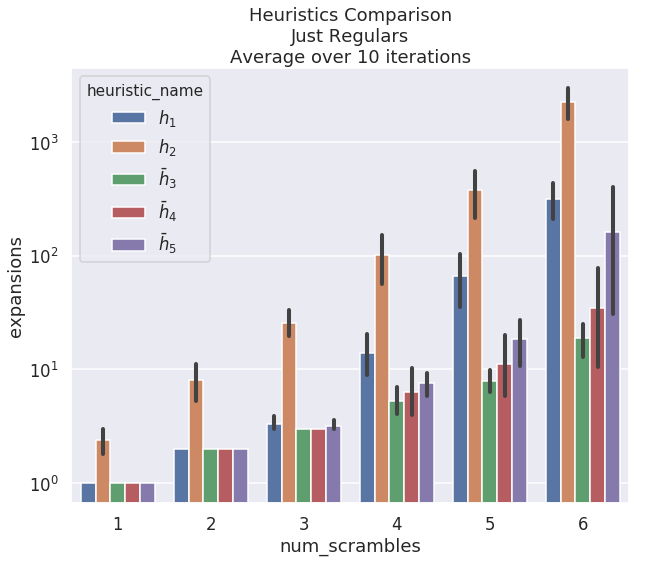

In [0]:
iterations = 10
scramble = np.arange(1, 8)
heuristics = {r'$h_1$': h_1,
              r'$h_2$': h_2,
              r'$\bar h_3$': h_3,
              r'$\bar h_4$': h_4,
              r'$\bar h_5$': h_5}

df1 = compare_and_plot(heuristics, iterations, scramble, 'Just Regulars');

### STEP 6 : Learning Model

In [0]:
# number of states in each distance from goal
count_vector = np.array([1, 12, 114, 1068, 10011, 93840, 878880, 8221632,
                         76843595, 717789576, 6701836858, 62549615248,
                         583570100997, 5442351625028, 50729620202582,
                         472495678811004, 4393570406220123, 40648181519827392,
                         368071526203620348, 3e18, 14e18, 19e18, 7e18, 24e15,
                         150000, 36, 3])
# (taken from http://cube20.org/qtm/)

def create_prob_vector(lower, upper):
  vec = count_vector[lower:upper]
  return vec / np.sum(vec)


def convex_combination(v , u, alpha):
  """ return covex combination of u, v i.e v*alpha + u*(1- alpha) """
  assert len(u) == len(v), 'u ,v must have same length'
  assert 0 <= alpha <= 1, 'alpha must be between 0 and 1'
  return np.array(v)*alpha + np.array(u)*(1-alpha)


def convex_combination_probabilities(alpha, lower, upper):
  """ 
  returns convex combination of real probability and uniform distribution
  real_probabilites*alpha + uniform*(1- alpha)
  """
  rel_prob = create_prob_vector(lower, upper)
  n = len(rel_prob)
  uniform = np.ones(n) / n
  return convex_combination(rel_prob, uniform, alpha)


def get_features_from_cube(cube):
  """ transforms the cube's array to 1d binary array """
  binary_array = keras.utils.to_categorical(cube.to_array(), rubik.NUM_FACES)
  return binary_array.flatten()


def data_generator(cube_layers, scramble, batch_size, p=None):
  """
  generates batches of scrambled cubes data, coupled with the number
  of scramble moves per row
  """
  new_dim = len(get_features_from_cube(rubik.Cube(cube_layers)))
  while True:
    data = np.empty((batch_size, new_dim), dtype=np.int8)
    labels = np.empty(batch_size, dtype=np.int8)
    for i in range(batch_size):
      c = rubik.Cube(cube_layers)
      d = np.random.choice(np.arange(scramblemax_d+1), p=p)
      rand_seq = rubik.generate_random_sequence(cube_layers, d)
      c.apply(rand_seq)
      data[i, :] = get_features_from_cube(c)
      labels[i] = d
    yield data, labels
    

def model_to_heuristic(model):
  """ creates a heuristic based on the given keras model """
  
  def _model_h(cube, problem=None):
    features = get_features_from_cube(cube)
    return model.predict(np.reshape(features, (1, -1)))[0][0]
  
  return _model_h


def get_model_filename(layers, scramble, hidden_units):
  delim = '_'
  suffix = '.h5'
  return delim.join([str(layers), str(scramble)] + 
                    [str(h) for h in hidden_units]) + suffix

#### STEP 6.1 : Training with different parameters
Train different net architectures and compare them:
* $\hat h_1$: 3 layers with 70, 60 and 50 neurons respectively
* $\hat h_2$: 4 layers with 50 neurons in each layer
* $\hat h_3$: 5 layers with 50, 40, 30, 20, 20 neurons

mkdir: cannot create directory ‘models’: File exists
Evaluating models...


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


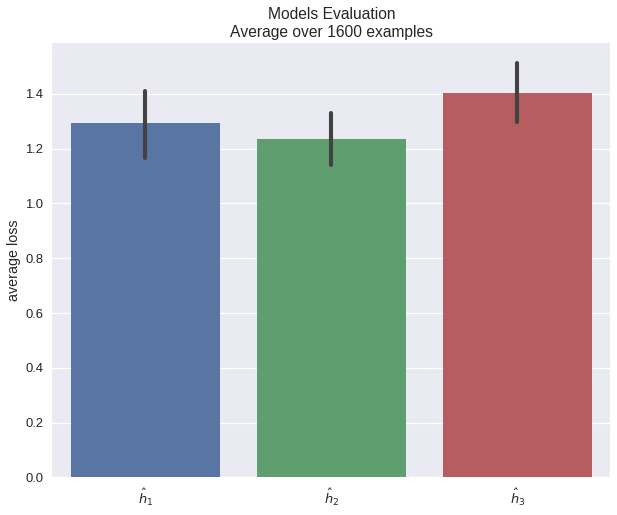

In [0]:
steps = 20
iterations = 10
batch_size = 8
scramble = 10
layers = 3
p = convex_combination_probabilities(0.1, 0, scramble+1)
loss = np.empty((iterations, 3))

print('Evaluating models...')
for i, m in enumerate([m1, m2, m3]):
  for j in range(iterations):
    loss[j, i] = m.evaluate_generator(
        data_generator(layers, scramble, batch_size, p), steps
    )

sns.barplot(data=pd.DataFrame({'$\hat h_1$': loss[:, 0],
                               '$\hat h_2$': loss[:, 1],
                               '$\hat h_3$': loss[:, 2]}));
plt.ylabel('average loss');
plt.title('Models Evaluation\n' + 
          'Average over %d examples' % (steps * iterations * batch_size));

### STEP 6.2 : Models comparison
Low regression loss is a good indication that the heursitic is accurate, but since the trained models have very similar losses, and compare them by using them to solve random cube instances. Here, the measured variable is the number of node expansions of the $A^*$ algorithm (same as the heuristics analysis above). 

In [0]:
hh1, hh2, hh3 = [model_to_heuristic(m) for m in [m1, m2, m3]]

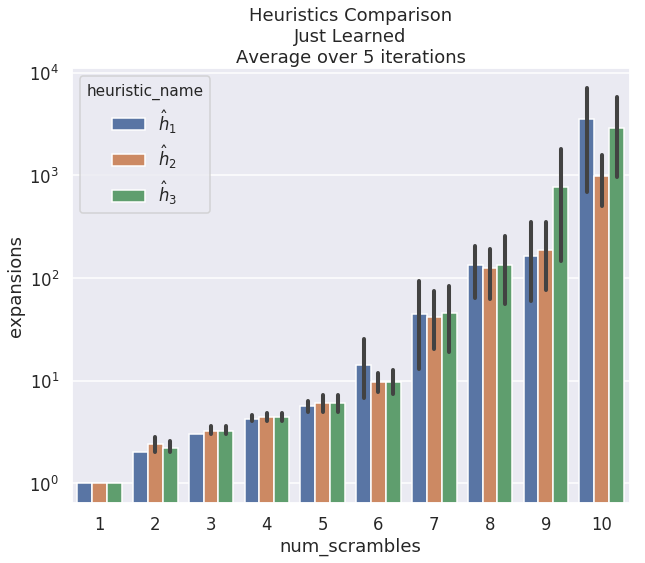

In [0]:
scramble = np.arange(1, 11)
iterations = 5
heuristics = {r'$\hat h_1$': hh1,
              r'$\hat h_2$': hh2,
              r'$\hat h_3$': hh3}
df3 = compare_and_plot(heuristics, iterations, scramble, 'Just Learned');

### STEP 7: Comparing Regular to Learned Heuristics
Run the same procedure as the above, with the "winners" from each of the groups.

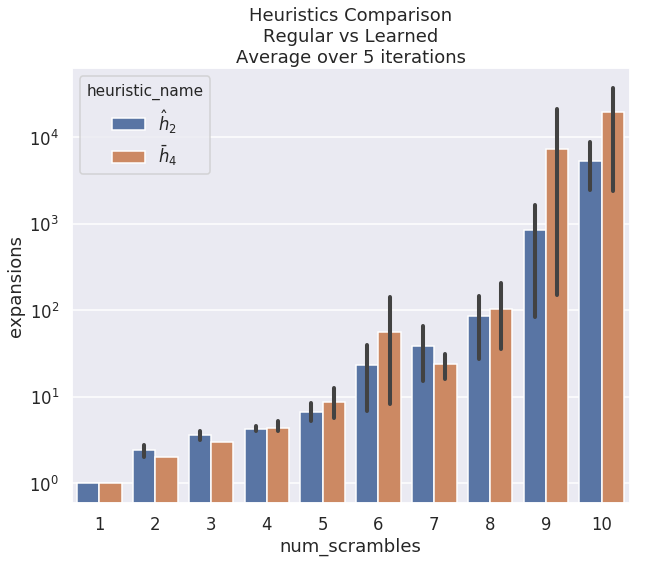

In [0]:
scramble = np.arange(1,11)
iterations = 5
heuristics = {r'$\hat h_2$': hh2,
              r'$\bar h_4$': h_4}
df6 = compare_and_plot(heuristics, iterations, scramble, 'Just Regular vs Just Learned');